In [19]:
# Essentials
import pandas as pd
import numpy as np
from utils.data_utils import get_paths

# Visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import pprint

In [2]:
path_to_data, results_dir = get_paths()

kw_baseline_scores = pd.read_csv(results_dir + "mean_kw_baselines.csv")
kw_baseline_scores.rename(columns={"Unnamed: 0": "baselines"}, inplace=True)
# kw_baseline_scores.set_index("baselines", inplace=True)
kw_baseline_scores

Path to data file - C:\Users\HP\Desktop\Tese\Dissertacao\Pratica\Tweet2Story\utils/../data/signal1M_tweetir_processed.csv
Path to output results directory - C:\Users\HP\Desktop\Tese\Dissertacao\Pratica\Tweet2Story\utils/../results/


,baselines,precision,jaccard,tweets_kw_tfidf,rouge1_precision,rouge1_fscore,R_precision,total_topics
0,TFIDF,32.062,20.091,0.107,3.206,3.206,3.206,97
1,RAKE,9.580,5.053,0.031,0.976,0.976,0.986,97
2,YAKE,29.794,18.787,0.097,3.060,3.065,2.993,97
3,TextRank,14.942,8.739,0.080,2.020,1.965,1.862,97
4,TopicRank,11.843,6.668,0.084,3.168,2.998,2.629,97
5,KeyBert,3.918,2.127,0.104,8.775,8.854,8.820,97


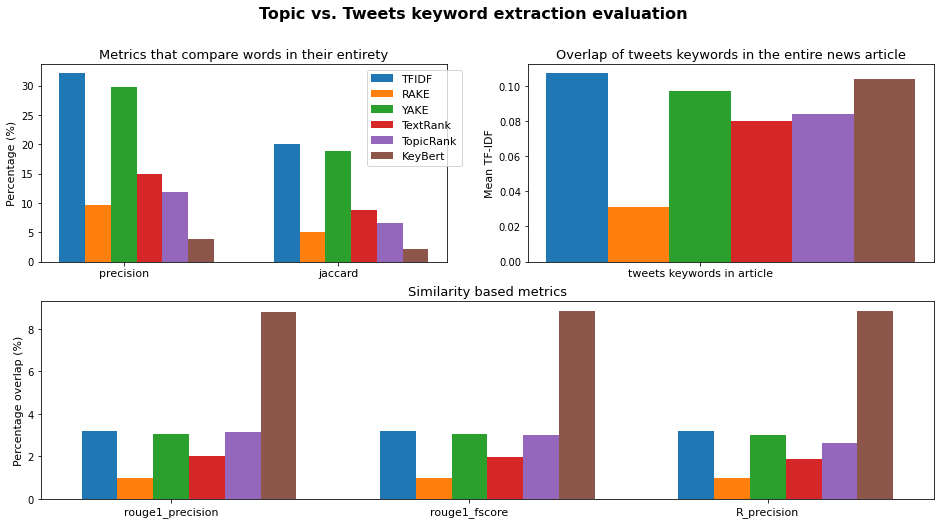

In [50]:
gs = gridspec.GridSpec(2,2)

pl.figure(figsize=(16,8))
plt.suptitle("Topic vs. Tweets keyword extraction evaluation", fontsize=16, fontweight="bold")


# Metrics for entire words
x = np.arange(2)  # Precision and jaccard
width=0.12

ax1 = pl.subplot(gs[0, 0])

ax1.bar(x - width*2, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "TFIDF", ["precision", "jaccard"]].values[0], width, label="TFIDF")
ax1.bar(x - width, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "RAKE", ["precision", "jaccard"]].values[0], width, label="RAKE")
ax1.bar(x, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "YAKE", ["precision", "jaccard"]].values[0], width, label="YAKE")
ax1.bar(x + width, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "TextRank", ["precision", "jaccard"]].values[0], width, label="TextRank")
ax1.bar(x + width*2, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "TopicRank", ["precision", "jaccard"]].values[0], width, label="TopicRank")
ax1.bar(x + width*3, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "KeyBert", ["precision", "jaccard"]].values[0], width, label="KeyBert")

ax1.set_title("Metrics that compare words in their entirety", fontsize=13)
ax1.set_xticks(x)
ax1.set_xticklabels(kw_baseline_scores.columns[1:3], fontsize=11)
ax1.set_ylabel("Percentage (%)", fontsize=11)

ax1.legend(bbox_to_anchor=(1.05, 1), loc="upper right", fontsize=11)


# Overlap of tweets keywords in the entire news article content (through TF-IDF)
x = np.arange(1)  # TFIDF of tweet keywords in complete news articles
width=0.02

ax2 = pl.subplot(gs[0, 1])

ax2.bar(x - width*2, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "TFIDF", ["tweets_kw_tfidf"]].values[0], width, label="TFIDF")
ax2.bar(x - width, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "RAKE", ["tweets_kw_tfidf"]].values[0], width, label="RAKE")
ax2.bar(x, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "YAKE", ["tweets_kw_tfidf"]].values[0], width, label="YAKE")
ax2.bar(x + width, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "TextRank", ["tweets_kw_tfidf"]].values[0], width, label="TextRank")
ax2.bar(x + width*2, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "TopicRank", ["tweets_kw_tfidf"]].values[0], width, label="TopicRank")
ax2.bar(x + width*3, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "KeyBert", ["tweets_kw_tfidf"]].values[0], width, label="KeyBert")

ax2.set_title("Overlap of tweets keywords in the entire news article", fontsize=13)
ax2.set_xticks(x)
ax2.set_xticklabels(["tweets keywords in article"], fontsize=11)
ax2.set_ylabel("Mean TF-IDF", fontsize=11)


# Similarity based metrics
x = np.arange(3)  # rouge and r-precision
width=0.12

ax3 = pl.subplot(gs[1, :])

ax3.bar(x - width*2, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "TFIDF", ["rouge1_precision", "rouge1_fscore", "R_precision"]].values[0], width, label="TFIDF")
ax3.bar(x - width, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "RAKE", ["rouge1_precision", "rouge1_fscore", "R_precision"]].values[0], width, label="RAKE")
ax3.bar(x, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "YAKE", ["rouge1_precision", "rouge1_fscore", "R_precision"]].values[0], width, label="YAKE")
ax3.bar(x + width, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "TextRank", ["rouge1_precision", "rouge1_fscore", "R_precision"]].values[0], width, label="TextRank")
ax3.bar(x + width*2, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "TopicRank", ["rouge1_precision", "rouge1_fscore", "R_precision"]].values[0], width, label="TopicRank")
ax3.bar(x + width*3, kw_baseline_scores.loc[kw_baseline_scores["baselines"] == "KeyBert", ["rouge1_precision", "rouge1_fscore", "R_precision"]].values[0], width, label="KeyBert")

ax3.set_title("Similarity based metrics", fontsize=13)
ax3.set_xticks(x)
ax3.set_xticklabels(kw_baseline_scores.columns[4:7], fontsize=11)
ax3.set_ylabel("Percentage overlap (%)", fontsize=11)

# fig.tight_layout()
plt.show()

## Some notes about the 3 graphs above
There are some nuances to each metric and way of evaluating the baselines, which will be explained here.

### Metrics that compare entire words
- __Precision__ - This precision compares entire words between the news keywords and the tweets keywords. It is a straightforward comparison.
- In general, __TFIDF__ usually gets better results, because it only contains __one-word keywords__, while other methods contain keywords with __more than one word__, which penalizes them more severely since they have more words they can fail.

### Overlap metrics
- The overlap between keywords extracted from tweets and the news content is __measured through TF-IDF__, since the python implementation of ROUGE does not take into consideration __repeated words__, so the evaluation was __not diverse__. It only changed when the keyword had more words.
- Each tweet keyword has a TF-IDF value from the news content TF-IDF matrix. A mean is made from each keyword the baseline gives.
- Again, the __TF-IDF__ baseline only predicts one-word keywords, therefore it gains a boost in the metric.

### Similarity based metrics
- The overlap is measured between every tweet keyword with every topic keyword.
- The percentage of overlap is __generally low__, because __only a few keywords are actually comparable__ with each other, but in order not to lose any comparison, every keyword is compared.
- __KeyBert__ shows a massive improvement compared to the other baselines. This is explained because KeyBert, unlike the others, __generates synthetic keywords__ repeating some of them a lot, therefore the overlap is greater between them all.